In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv("superstore.csv")

In [4]:
print(df.head())


print(df.columns)

print(df.info())

print("Missing values:\n", df.isnull().sum())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

In [5]:
df_cleaned=df.drop_duplicates()



df_cleaned=df_cleaned.dropna()


print(df_cleaned.shape)

numeric_cols=df_cleaned.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    q1=df_cleaned[col].quantile(0.25)
    q3=df_cleaned[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df_cleaned = df_cleaned[(df_cleaned[col] >= lb) & (df_cleaned[col] <= ub)]



print(df_cleaned.shape)

(51290, 27)
(31775, 27)


In [6]:
stats = df_cleaned.describe().T[['mean', '50%', 'std']]  # 50% = median
stats['var'] = df_cleaned.var(numeric_only=True)
stats.rename(columns={'50%': 'median'}, inplace=True)
print("\nStatistical Summary:\n", stats)

corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr_matrix)


Statistical Summary:
                        mean    median           std           var
Discount           0.093055      0.00      0.151810  2.304629e-02
记录数                1.000000      1.00      0.000000  0.000000e+00
Profit            12.351458      7.68     21.722512  4.718675e+02
Quantity           2.874713      3.00      1.612040  2.598673e+00
Row.ID         25014.629237  25077.00  14780.744177  2.184704e+08
Sales             73.250134     50.00     66.738460  4.454022e+03
Shipping.Cost      6.640990      4.55      6.048856  3.658866e+01
Year            2012.777215   2013.00      1.097528  1.204567e+00
weeknum           31.291833     33.00     14.399202  2.073370e+02

Correlation Matrix:
                Discount  记录数    Profit  Quantity    Row.ID     Sales  \
Discount       1.000000  NaN -0.316490 -0.019875  0.087594 -0.086728   
记录数                 NaN  NaN       NaN       NaN       NaN       NaN   
Profit        -0.316490  NaN  1.000000  0.104365 -0.019037  0.484923   
Quantit

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


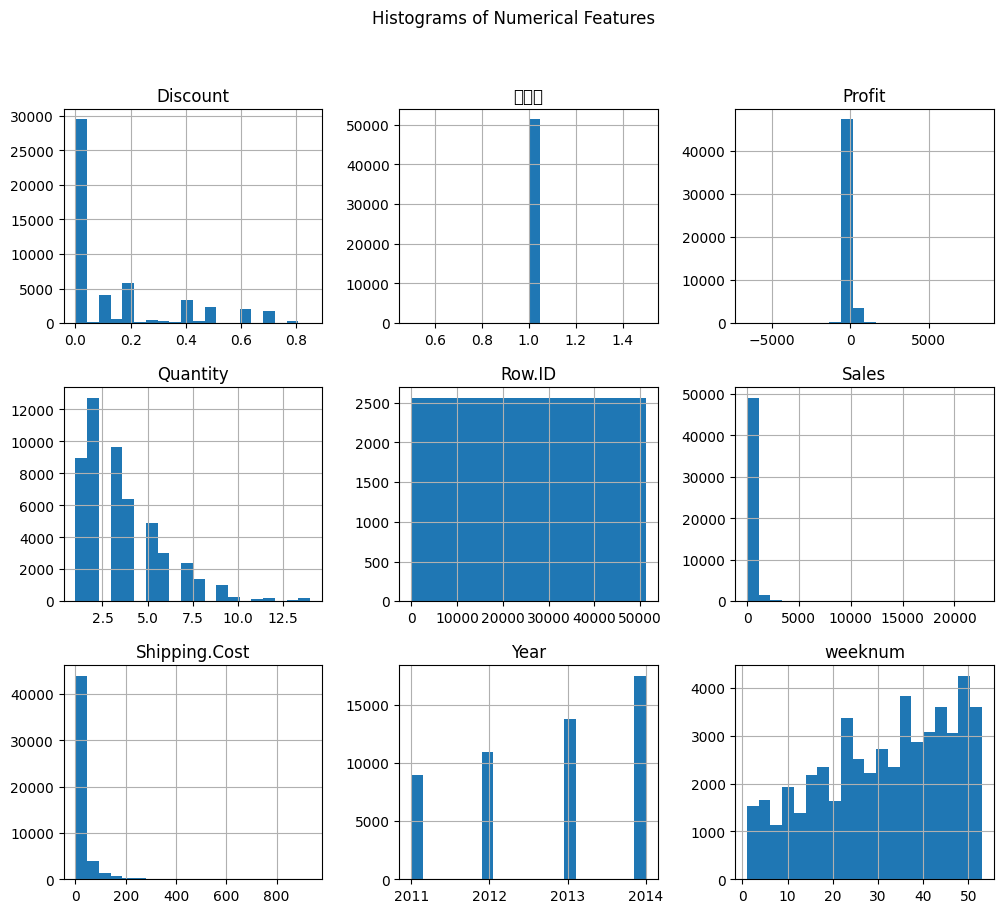

C:\Users\HP\AppData\Local\Temp\ipykernel_12208\1121038052.py:10: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_12208\1121038052.py:10: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_12208\1121038052.py:10: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

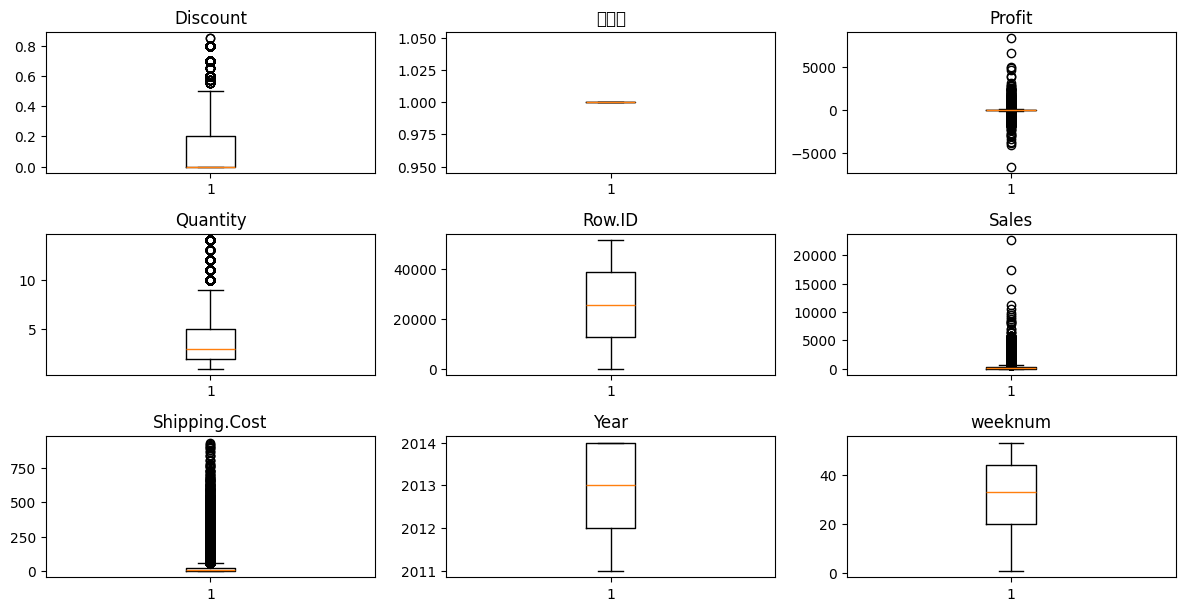

In [7]:
df[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

plt.figure(figsize=(12, 8))  
for i, col in enumerate(numeric_cols, 1):  
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  
    plt.boxplot(df[col].dropna())  
    plt.title(col)  
plt.tight_layout()  
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12208\1515836.py:14: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_12208\1515836.py:14: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_12208\1515836.py:14: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\

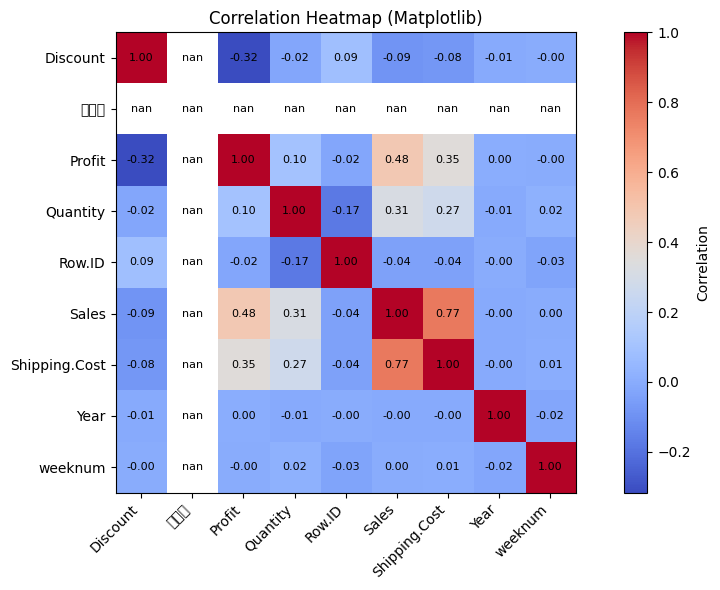

In [8]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=8)

plt.title("Correlation Heatmap (Matplotlib)")
plt.tight_layout()
plt.show()